In [1]:
import pandas as pd
import mplfinance as mpf
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed
/Users/efsaaktay/anaconda3/envs/hku_202324S2/lib/python3.8/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


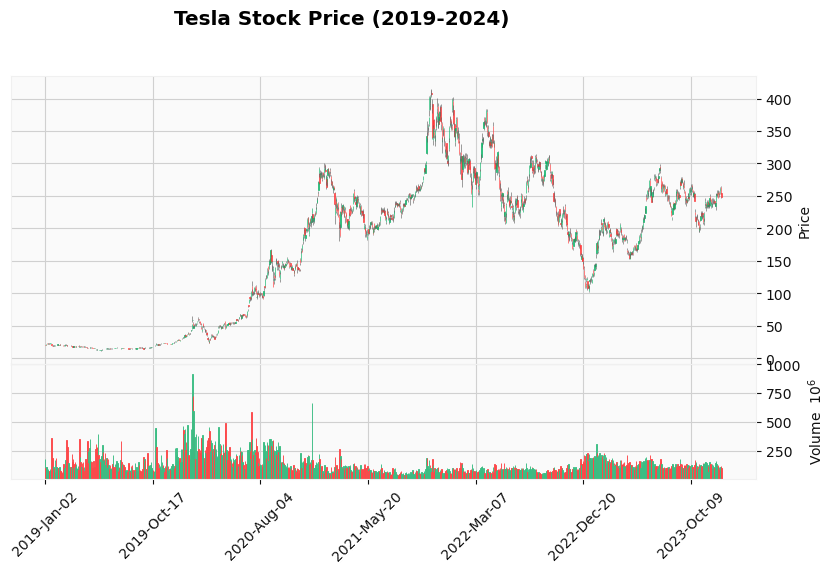

In [5]:
#Download Tesla stock data for the past 5 years
tesla_data = yf.download('TSLA', start='2019-01-01', end='2024-01-01')

# Create a plot with annotations
fig, axes = mpf.plot(tesla_data,
                      type='candle',
                      volume=True,
                      figratio=(18, 10),
                      title='Tesla Stock Price (2019-2024)',
                      style='yahoo',
                      returnfig=True)

# Add annotations for major stock movements (example dates, you will replace these)
important_dates = ['2020-03-01', '2021-07-01', '2022-12-01']
annotations = ['COVID-19 market crash', 'Record profits Q2', 'Elon Musk tweet controversy']

for date, label in zip(important_dates, annotations):
    if date in tesla_data.index:
        high_price = tesla_data.loc[date, 'High']
        axes[0].annotate(label, xy=(pd.Timestamp(date), high_price),
                         xytext=(10, 30), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

# Customize and save the plot
mpf.show()
fig.savefig('Tesla_Stock_Analysis.pdf')

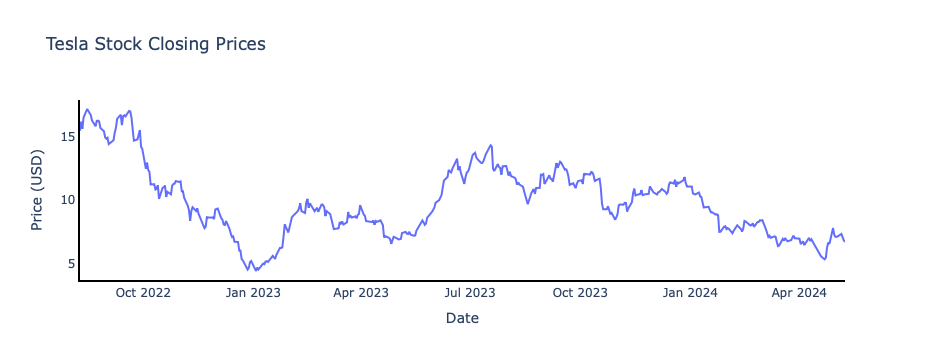

In [4]:
import yfinance as yf
import plotly.graph_objects as go

# Fetch historical data for Tesla
tesla = yf.Ticker("TSL")
data = tesla.history(period="5y")  # Fetch data for the past year

# Create an interactive plot with minimalist axes
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close'))
fig.update_layout(
    title='Tesla Stock Closing Prices',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    hovermode="x",
    xaxis=dict(showgrid=False, showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(showgrid=False, showline=True, linewidth=2, linecolor='black'),
    plot_bgcolor='white'  # Ensuring background is white for better visibility of axes
)

fig.show()

[*********************100%%**********************]  1 of 1 completed


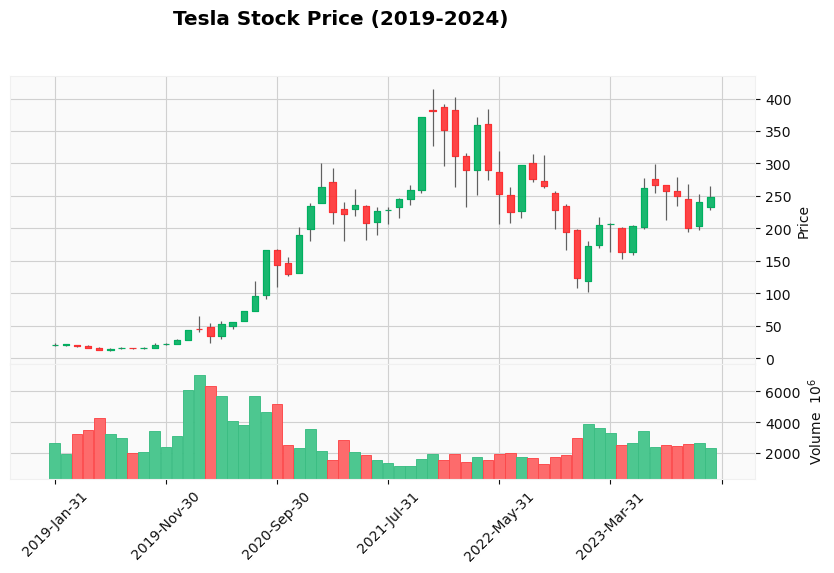

In [8]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Download Tesla stock data for the past 5 years
tesla_data = yf.download('TSLA', start='2019-01-01', end='2024-01-01')

# Option 1: Resample the data for a less frequent time interval (e.g., monthly)
monthly_data = tesla_data.resample('M').agg({'Open': 'first', 
                                             'High': 'max', 
                                             'Low': 'min', 
                                             'Close': 'last',
                                             'Volume': 'sum'})

# Option 2: Plot using a line plot for a simpler view (uncomment to use)
# mpf.plot(tesla_data, type='line', figratio=(18, 10), title='Tesla Stock Price (2019-2024)', style='yahoo')

# Option 3: Plot using candlestick but suppress the warning for too much data
fig, axes = mpf.plot(monthly_data,
                      type='candle',
                      volume=True,
                      warn_too_much_data=2000,  # Assuming you are plotting less than 2000 points
                      figratio=(18, 10),
                      title='Tesla Stock Price (2019-2024)',
                      style='yahoo',
                      returnfig=True)

# Add annotations for major stock movements (example dates, you will replace these)
important_dates = ['2020-03-01', '2021-07-01', '2022-12-01']
annotations = ['COVID-19 market crash', 'Record profits Q2', 'Elon Musk tweet controversy']

for date, label in zip(important_dates, annotations):
    if date in monthly_data.index:
        high_price = monthly_data.loc[date, 'High']
        axes[0].annotate(label, xy=(pd.Timestamp(date), high_price),
                         xytext=(10, 30), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

# Customize, show, and save the plot
mpf.show()
fig.savefig('Tesla_Stock_Analysis.pdf')

In [13]:
# Adjusting important_dates to the last day of the month
important_dates = [
    pd.Timestamp('2020-03-01').to_period('M').to_timestamp(how='end'),
    pd.Timestamp('2021-07-01').to_period('M').to_timestamp(how='end'),
    pd.Timestamp('2022-12-01').to_period('M').to_timestamp(how='end')
]

In [14]:
# Resampling data to use the first day of the month as the index
monthly_data = tesla_data.resample('MS').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

[*********************100%%**********************]  1 of 1 completed


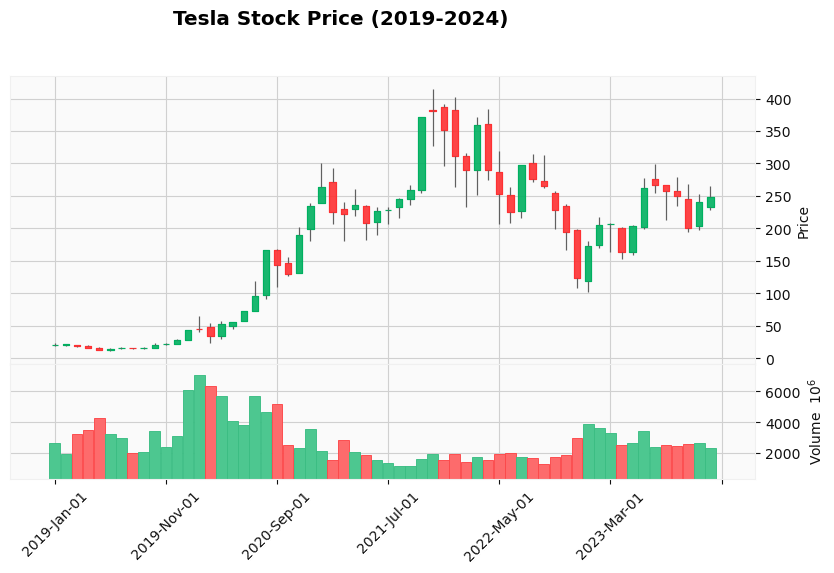

In [15]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Download Tesla stock data for the past 5 years
tesla_data = yf.download('TSLA', start='2019-01-01', end='2024-01-01')

# Resample the data for a less frequent time interval (e.g., month start)
monthly_data = tesla_data.resample('MS').agg({
    'Open': 'first', 
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Plot using candlestick but suppress the warning for too much data
fig, axes = mpf.plot(monthly_data,
                     type='candle',
                     volume=True,
                     warn_too_much_data=2000,  # Assuming you are plotting less than 2000 points
                     figratio=(18, 10),
                     title='Tesla Stock Price (2019-2024)',
                     style='yahoo',
                     returnfig=True)

# Add annotations for major stock movements
important_dates = ['2020-03-01', '2021-07-01', '2022-12-01']
annotations = ['COVID-19 market crash', 'Record profits Q2', 'Elon Musk tweet controversy']

for date, label in zip(important_dates, annotations):
    date_pd = pd.Timestamp(date)
    if date_pd in monthly_data.index:
        high_price = monthly_data.loc[date_pd, 'High']
        axes[0].annotate(label, xy=(date_pd, high_price),
                         xytext=(10, -30), textcoords='offset points',
                         arrowprops=dict(arrowstyle='->', color='red'),
                         fontsize=12, color='red')
    else:
        print(f"Date {date} not found in index.")  # Debug print

# Show and save the plot
mpf.show()
fig.savefig('Tesla_Stock_Analysis.pdf')

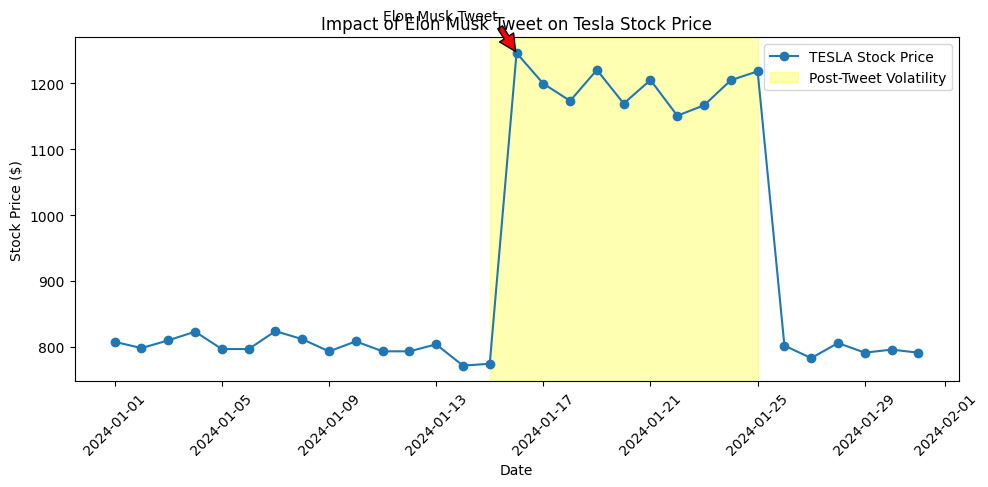

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate dummy stock prices
np.random.seed(42)
dates = np.arange(np.datetime64('2024-01-01'), np.datetime64('2024-02-01'))
prices = np.random.normal(loc=800, scale=15, size=len(dates))
sharp_spike = np.random.normal(loc=1200, scale=25, size=10)  # Simulated impact from the tweet
prices[15:25] = sharp_spike

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(dates, prices, label='TESLA Stock Price', marker='o')
plt.title('Impact of Elon Musk Tweet on Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.xticks(rotation=45)

# Annotate the day of the tweet
tweet_date = dates[15]
tweet_price = prices[15]
plt.annotate('Elon Musk Tweet', xy=(tweet_date, tweet_price), xytext=(tweet_date - np.timedelta64(5, 'D'), tweet_price + 50),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Highlight the area with increased volatility
plt.axvspan(dates[14], dates[24], color='yellow', alpha=0.3, label='Post-Tweet Volatility')

plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

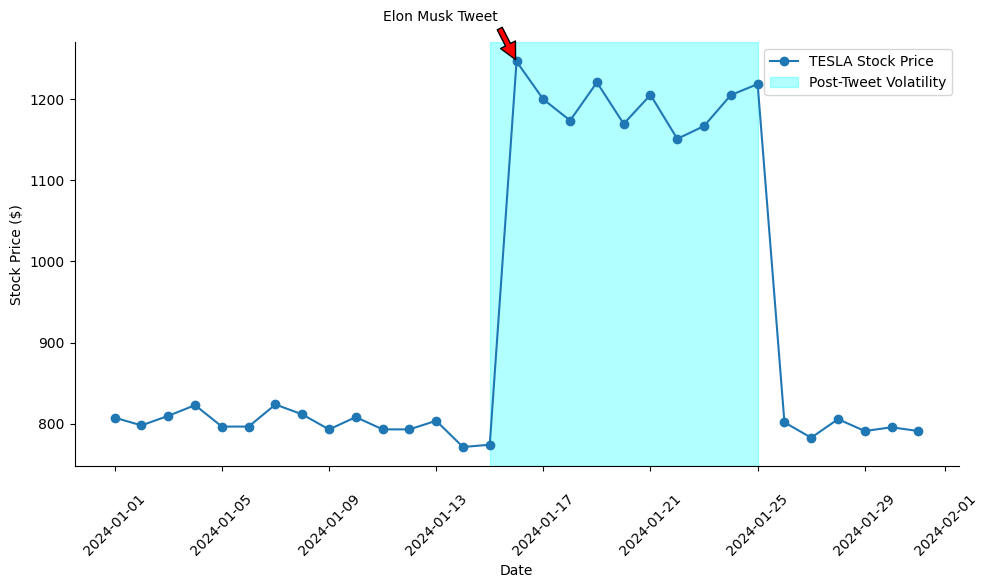

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generate dummy stock prices
np.random.seed(42)
dates = np.arange(np.datetime64('2024-01-01'), np.datetime64('2024-02-01'))
prices = np.random.normal(loc=800, scale=15, size=len(dates))
sharp_spike = np.random.normal(loc=1200, scale=25, size=10)  # Simulated impact from the tweet
prices[15:25] = sharp_spike

# Create a plot
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(dates, prices, label='TESLA Stock Price', marker='o')

# Set axes labels
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

# Improve aesthetics for x-axis
plt.xticks(rotation=45)
plt.gca().tick_params(axis='x', which='major', pad=15)  # Increase padding to make space under x-axis labels

# Annotate the day of the tweet
tweet_date = dates[15]
tweet_price = prices[15]
plt.annotate('Elon Musk Tweet', xy=(tweet_date, tweet_price), xytext=(tweet_date - np.timedelta64(5, 'D'), tweet_price + 50),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Highlight the area with increased volatility
plt.axvspan(dates[14], dates[24], color='cyan', alpha=0.3, label='Post-Tweet Volatility')

plt.legend()

# Remove the top and right spines to achieve an open plot look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Adjust layout
plt.show()

[*********************100%%**********************]  1 of 1 completed


ConversionError: Failed to convert value(s) to axis units: '2018-08-07'

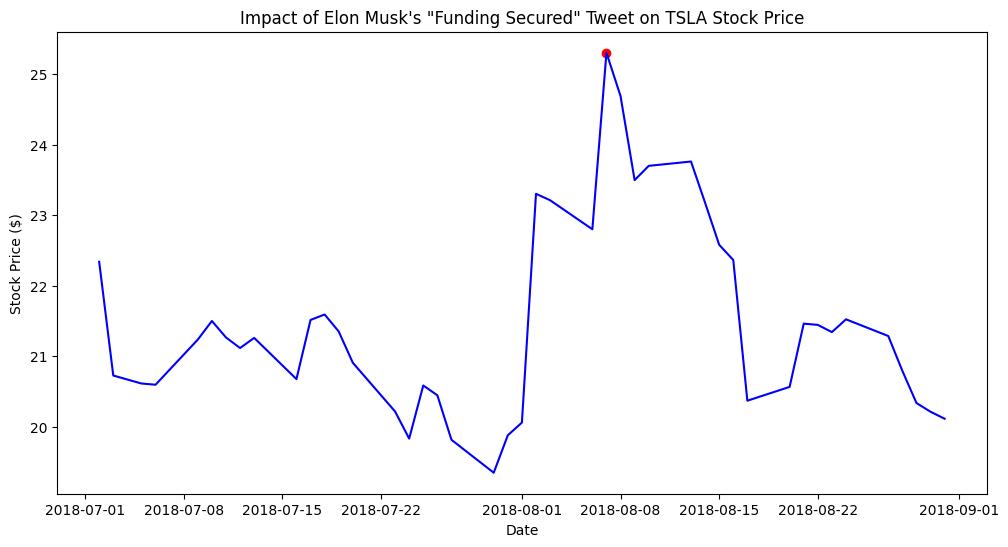

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for Tesla
ticker = "TSLA"
start_date = "2018-07-01"
end_date = "2018-09-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was fetched successfully
if data.empty:
    print("Failed to fetch data. Check the ticker symbol and date range.")
else:
    # Plotting the Close price
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.scatter(['2018-08-07'], data.at['2018-08-07', 'Close'], color='red')  # highlight the day of the tweet
    plt.title(f'Impact of Elon Musk\'s "Funding Secured" Tweet on {ticker} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.axvline(x='2018-08-07', color='red', linestyle='--', label='Tweet: "Funding secured"')
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Download historical data for Tesla around the tweet date
ticker = "TSLA"
start_date = "2018-07-01"
end_date = "2018-09-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was fetched successfully
if data.empty:
    print("Failed to fetch data. Check the ticker symbol and date range.")
else:
    # Extract dates and adjusted close prices
    dates = data.index
    prices = data['Adj Close']

    # Create a plot
    plt.figure(figsize=(10, 6))
    plt.plot(dates, prices, label='TESLA Stock Price', marker='o', color='blue')

    # Set axes labels
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')

    # Improve aesthetics for x-axis
    plt.xticks(rotation=45)
    plt.gca().tick_params(axis='x', which='major', pad=15)  # Increase padding to make space under x-axis labels

    # Annotate the day of the tweet
    tweet_date = '2018-08-07'
    tweet_price = data.at[tweet_date, 'Adj Close']
    plt.annotate('Elon Musk Tweet: "Funding Secured"', xy=(tweet_date, tweet_price), xytext=(np.datetime64(tweet_date) - np.timedelta64(10, 'D'), tweet_price + 50),
                 arrowprops=dict(facecolor='red', shrink=0.05))

    # Highlight the area with increased volatility
    plt.axvspan(np.datetime64('2018-08-07'), np.datetime64('2018-08-17'), color='cyan', alpha=0.3, label='Post-Tweet Volatility')

    plt.legend()

    # Remove the top and right spines to achieve an open plot look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()  # Adjust layout
    plt.show()

[*********************100%%**********************]  1 of 1 completed


ConversionError: Failed to convert value(s) to axis units: '2018-08-07'

Error in callback <function _draw_all_if_interactive at 0x7fc82d915ca0> (for post_execute):


ConversionError: Failed to convert value(s) to axis units: '2018-08-07'

ConversionError: Failed to convert value(s) to axis units: '2018-08-07'

<Figure size 1000x600 with 1 Axes>

[*********************100%%**********************]  1 of 1 completed
/var/folders/f0/ckkb_ykj483d49h__2mxzsk00000gn/T/ipykernel_2467/3851827830.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout


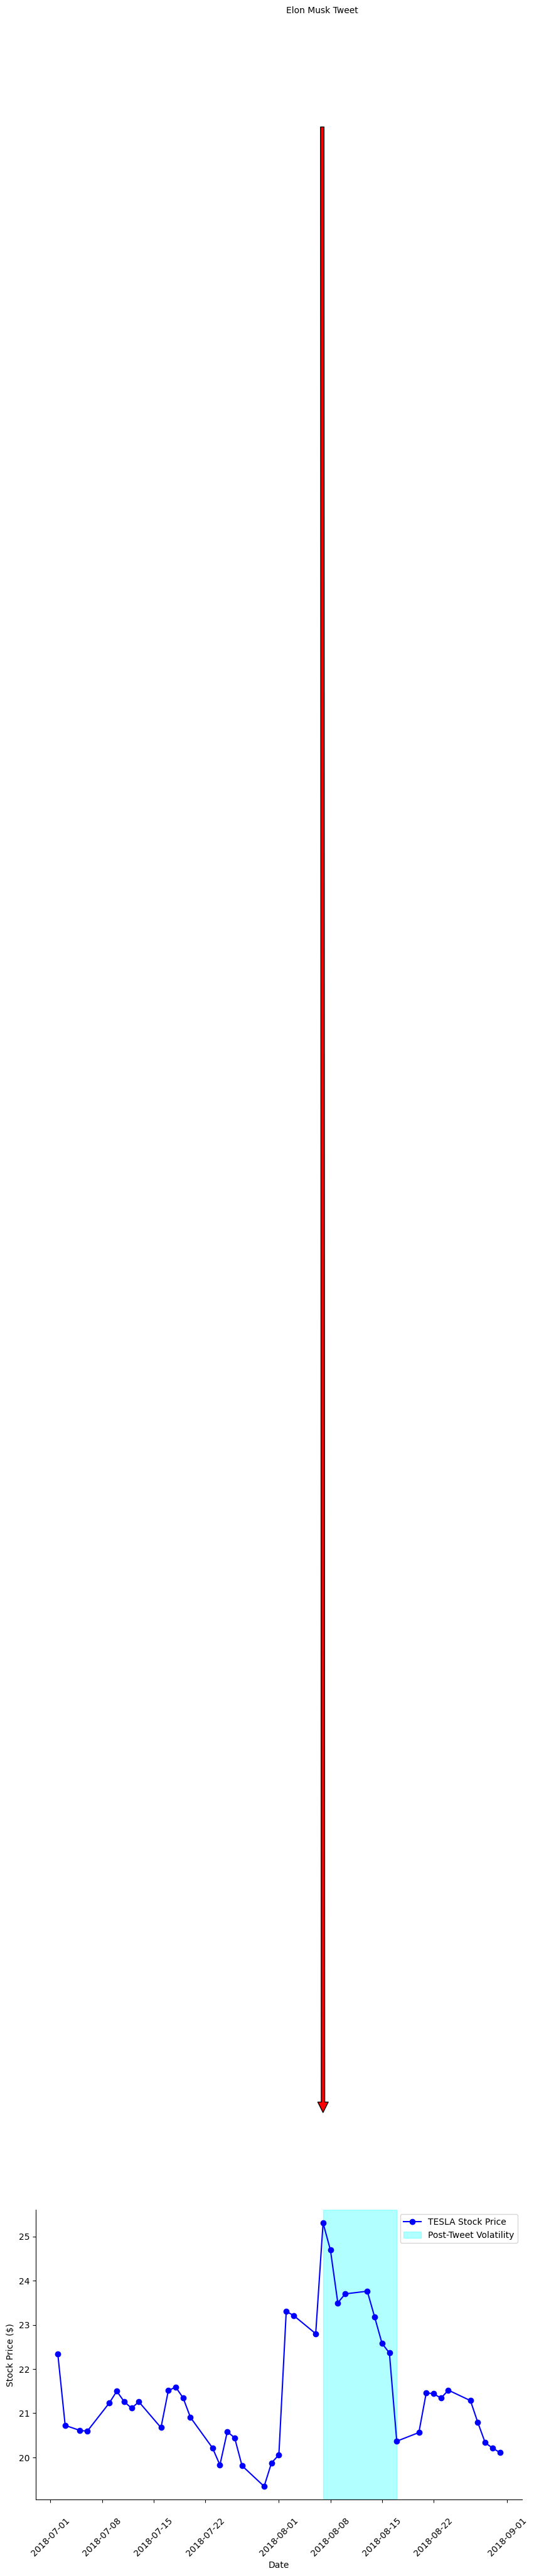

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas for handling dates

# Download historical data for Tesla around the tweet date
ticker = "TSLA"
start_date = "2018-07-01"
end_date = "2018-09-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Check if the data was fetched successfully
if data.empty:
    print("Failed to fetch data. Check the ticker symbol and date range.")
else:
    # Extract dates and adjusted close prices
    dates = data.index
    prices = data['Adj Close']

    # Create a plot
    plt.figure(figsize=(10, 6))
    plt.plot(dates, prices, label='TESLA Stock Price', marker='o', color='blue')

    # Set axes labels
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')

    # Improve aesthetics for x-axis
    plt.xticks(rotation=45)
    plt.gca().tick_params(axis='x', which='major', pad=15)  # Increase padding to make space under x-axis labels

    # Convert the date string to a pandas.Timestamp
    tweet_date = pd.to_datetime('2018-08-07')
    tweet_price = data.at[tweet_date, 'Adj Close']
    plt.annotate('Elon Musk Tweet', xy=(tweet_date, tweet_price), xytext=(tweet_date - np.timedelta64(5, 'D'), tweet_price + 50),
             arrowprops=dict(facecolor='red', shrink=0.05))

    # Highlight the area with increased volatility
    plt.axvspan(tweet_date, tweet_date + pd.Timedelta(days=10), color='cyan', alpha=0.3, 
                label='Post-Tweet Volatility')

    plt.legend()

    # Remove the top and right spines to achieve an open plot look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()  # Adjust layout
    plt.show()

[*********************100%%**********************]  1 of 1 completed
/var/folders/f0/ckkb_ykj483d49h__2mxzsk00000gn/T/ipykernel_2467/2764716601.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout


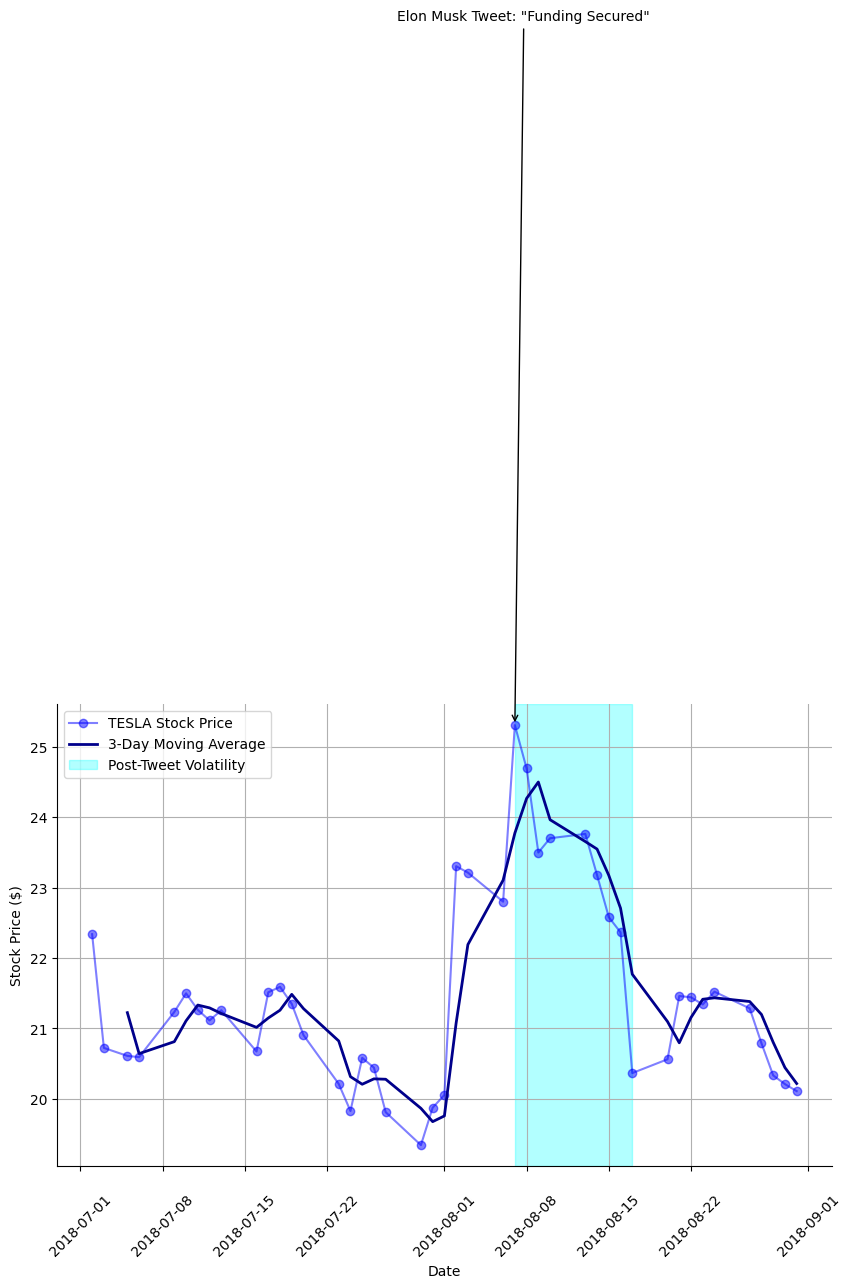

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download historical data for Tesla around the tweet date
ticker = "TSLA"
start_date = "2018-07-01"
end_date = "2018-09-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Check if the data was fetched successfully
if data.empty:
    print("Failed to fetch data. Check the ticker symbol and date range.")
else:
    # Extract dates and adjusted close prices
    dates = data.index
    prices = data['Adj Close']

    # Calculate a simple moving average for smoother data visualization
    moving_avg = prices.rolling(window=3).mean()

    # Create a plot
    plt.figure(figsize=(10, 6))
    plt.plot(dates, prices, label='TESLA Stock Price', marker='o', color='blue', alpha=0.5)
    plt.plot(dates, moving_avg, label='3-Day Moving Average', color='darkblue', linewidth=2)

    # Set axes labels
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')

    # Improve aesthetics for x-axis
    plt.xticks(rotation=45)
    plt.gca().tick_params(axis='x', which='major', pad=15)

    # Convert the date string to a pandas.Timestamp
    tweet_date = pd.to_datetime('2018-08-07')
    tweet_price = data.at[tweet_date, 'Adj Close']
    plt.annotate('Elon Musk Tweet: "Funding Secured"', xy=(tweet_date, tweet_price),
                 xytext=(tweet_date - pd.Timedelta(days=10), tweet_price + 10),
                 arrowprops=dict(facecolor='red', arrowstyle='->', connectionstyle="arc3,rad=.5"))

    # Highlight the area with increased volatility
    plt.axvspan(tweet_date, tweet_date + pd.Timedelta(days=10), color='cyan', alpha=0.3, label='Post-Tweet Volatility')

    plt.legend()

    # Remove the top and right spines to achieve an open plot look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()  # Adjust layout
    plt.grid(True)  # Add grid for better readability
    plt.show()

[*********************100%%**********************]  1 of 1 completed


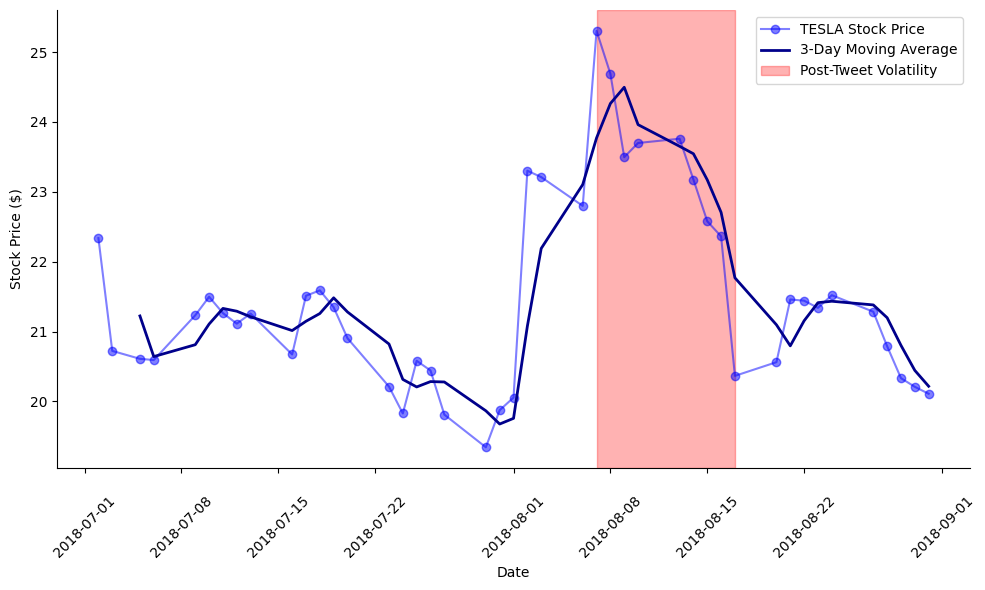

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download historical data for Tesla around the tweet date
ticker = "TSLA"
start_date = "2018-07-01"
end_date = "2018-09-01"
data = yf.download(ticker, start=start_date, end=end_date)

if not data.empty:
    # Extract dates and adjusted close prices
    dates = data.index
    prices = data['Adj Close']

    # Calculate a simple moving average for smoother data visualization
    moving_avg = prices.rolling(window=3).mean()

    # Create a plot
    plt.figure(figsize=(10, 6))
    plt.plot(dates, prices, label='TESLA Stock Price', marker='o', color='blue', alpha=0.5)
    plt.plot(dates, moving_avg, label='3-Day Moving Average', color='darkblue', linewidth=2)

    # Set axes labels
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')

    # Improve aesthetics for x-axis
    plt.xticks(rotation=45)
    plt.gca().tick_params(axis='x', which='major', pad=15)

    # Highlight the area with increased volatility
    tweet_date = pd.to_datetime('2018-08-07')
    plt.axvspan(tweet_date, tweet_date + pd.Timedelta(days=10), color='red', alpha=0.3, 
                label='Post-Tweet Volatility')

    plt.legend()

    # Remove the top and right spines to achieve an open plot look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()  # Adjust layout

    # Save the plot as a PNG file
    plt.savefig('tesla_stock_price_chart.png', format='png')
    plt.show()
else:
    print("Failed to fetch data. Check the ticker symbol and date range.")

[*********************100%%**********************]  1 of 1 completed


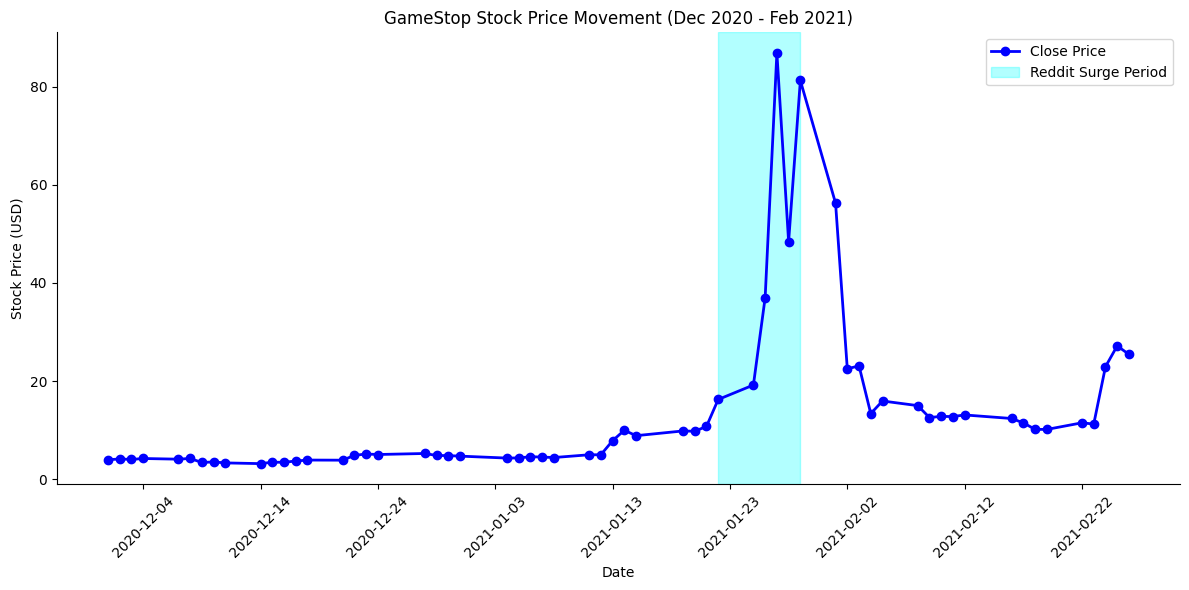

In [34]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Set the ticker and the date range of interest
ticker = "GME"
start_date = "2020-12-01"
end_date = "2021-02-28"

# Download the historical data for GameStop
data = yf.download(ticker, start=start_date, end=end_date)

if not data.empty:
    # Plotting the stock price
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue', marker='o', linewidth=2)

    # Highlight the period of significant activity
    surge_start = pd.to_datetime("2021-01-22")
    surge_end = pd.to_datetime("2021-01-29")
    plt.axvspan(surge_start, surge_end, color='cyan', alpha=0.3, label='Reddit Surge Period')

    # Adding title and labels
    plt.title('GameStop Stock Price Movement (Dec 2020 - Feb 2021)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()

    # Formatting the x-axis for better readability
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Reduce number of x-axis labels
    plt.xticks(rotation=45)  # Rotate date labels for clarity

    # Remove the grid
    plt.grid(False)

    # Remove top and right spines
    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)  # Optionally remove the left spine
    ax.spines['bottom'].set_visible(True)  # Optionally change the color of the bottom spine

    # Arrow showing the stock price movement upwards
    start_point = data.loc[surge_start, 'Close']
    end_point = data.loc[surge_end, 'Close']


    plt.tight_layout()  # Adjust layout to make room for the rotated date labels
    plt.savefig('gamestop_stock_price_chart.png', format='png')
    plt.show()
else:
    print("Failed to fetch data. Check the ticker symbol and date range.")

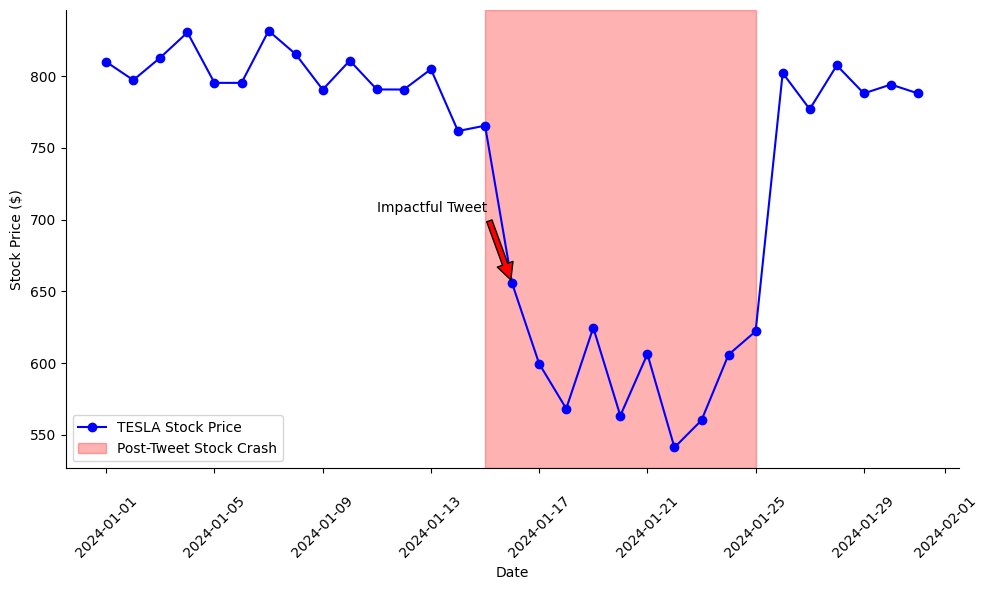

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Generate dates for one month
dates = np.arange(np.datetime64('2024-01-01'), np.datetime64('2024-02-01'))

# Generate dummy stock prices with a normal trend
prices = np.random.normal(loc=800, scale=20, size=len(dates))

# Simulate a stock crash influenced by a tweet
crash_drop = np.random.normal(loc=600, scale=30, size=10)  # More severe drop
prices[15:25] = crash_drop  # Applying the drop to the prices

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(dates, prices, label='TESLA Stock Price', marker='o', color='blue')

# Set axes labels
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

# Improve aesthetics for x-axis
plt.xticks(rotation=45)
plt.gca().tick_params(axis='x', which='major', pad=15)  # Increase padding to make space under x-axis labels

# Annotate the day of the tweet
tweet_date = dates[15]
tweet_price = prices[15]
plt.annotate('Impactful Tweet', xy=(tweet_date, tweet_price), xytext=(tweet_date - np.timedelta64(5, 'D'), tweet_price + 50),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Highlight the area with increased volatility due to the tweet
plt.axvspan(dates[14], dates[24], color='red', alpha=0.3, label='Post-Tweet Stock Crash')

plt.legend()

# Remove the top and right spines to achieve an open plot look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Adjust layout
plt.show()

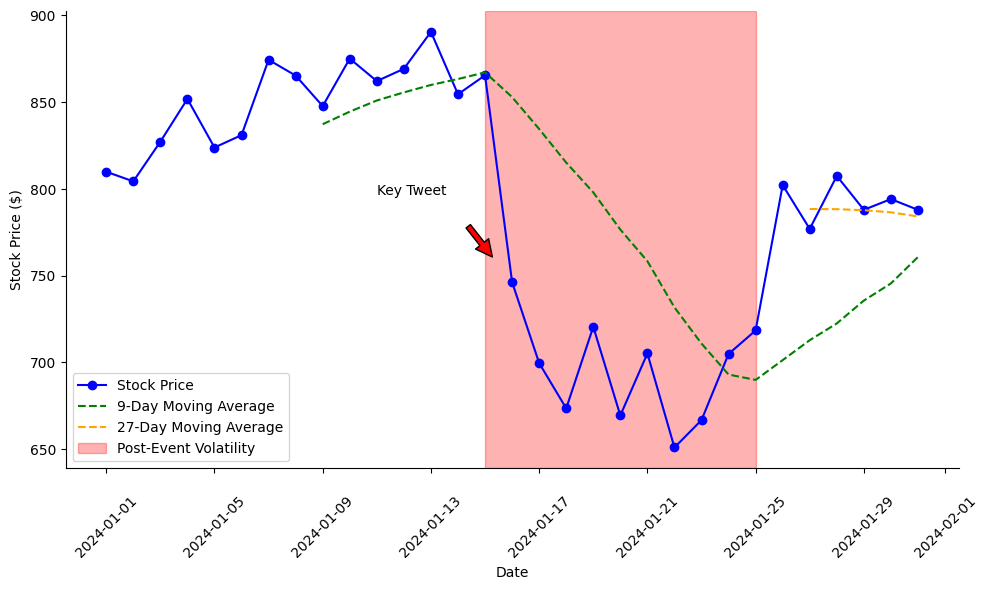

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Generate dates for one month
dates = np.arange(np.datetime64('2024-01-01'), np.datetime64('2024-02-01'))

# Generate dummy stock prices with a normal trend
prices = np.random.normal(loc=800, scale=20, size=len(dates))
prices[:15] += np.linspace(0, 100, 15)  # Simulating an initial rise
crash_drop = np.random.normal(loc=700, scale=25, size=10)  # Simulating a severe drop
prices[15:25] = crash_drop  # Applying the drop to the prices

# Calculate a 9-day moving average
moving_avg_9 = np.convolve(prices, np.ones(9)/9, mode='valid')

# Calculate a 27-day moving average
moving_avg_27 = np.convolve(prices, np.ones(27)/27, mode='valid')

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(dates, prices, label='Stock Price', marker='o', color='blue')
plt.plot(dates[8:], moving_avg_9, label='9-Day Moving Average', linestyle='--', color='green')
plt.plot(dates[26:], moving_avg_27, label='27-Day Moving Average', linestyle='--', color='orange')

# Set axes labels
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

# Improve aesthetics for x-axis
plt.xticks(rotation=45)
plt.gca().tick_params(axis='x', which='major', pad=15)  # Increase padding to make space under x-axis labels

# Annotate the day of the tweet
tweet_date = dates[15]
tweet_price = prices[15]
plt.annotate('Key Event', xy=(tweet_date, tweet_price), xytext=(tweet_date - np.timedelta64(5, 'D'), tweet_price + 50),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Highlight the area with increased volatility due to the tweet
plt.axvspan(dates[14], dates[24], color='red', alpha=0.3, label='Post-Event Volatility')

plt.legend()

# Remove the top and right spines to achieve an open plot look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Adjust layout
plt.show()
plt.savefig('stock_price_chart.png', format='png')

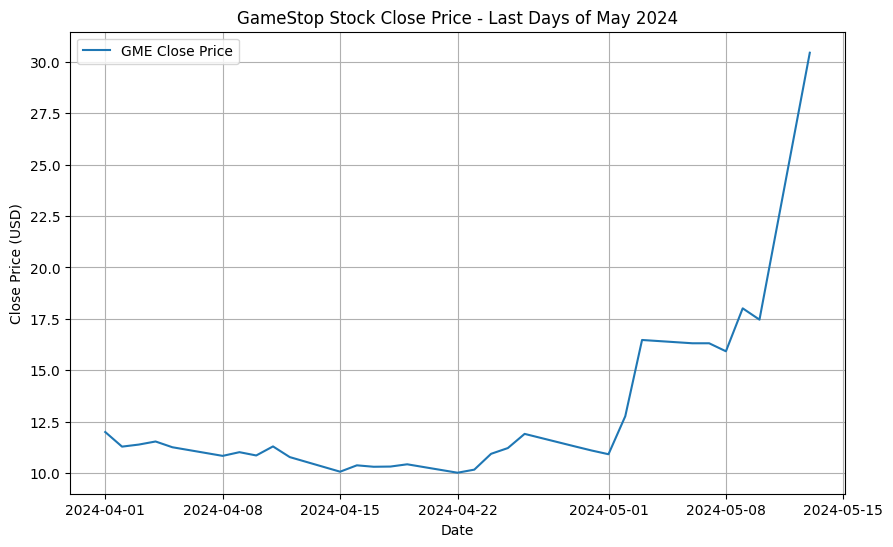

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the ticker symbol
tickerSymbol = 'GME'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Assuming the current date is within or past May 2024, we can use datetime to define the range
today = datetime.today().strftime('%Y-%m-%d')
start_date = '2024-04-01'  # Adjust the start date to the last few days of May 2024
end_date = '2024-05-14'  # This assumes you want data until the end of May

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)

# Check if there is any data
if not tickerDf.empty:
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(tickerDf['Close'], label='GME Close Price')
    plt.title('GameStop Stock Close Price - Last Days of May 2024')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data available for the specified range. Please check the dates or wait until the data becomes available.")

[*********************100%%**********************]  4 of 4 completed


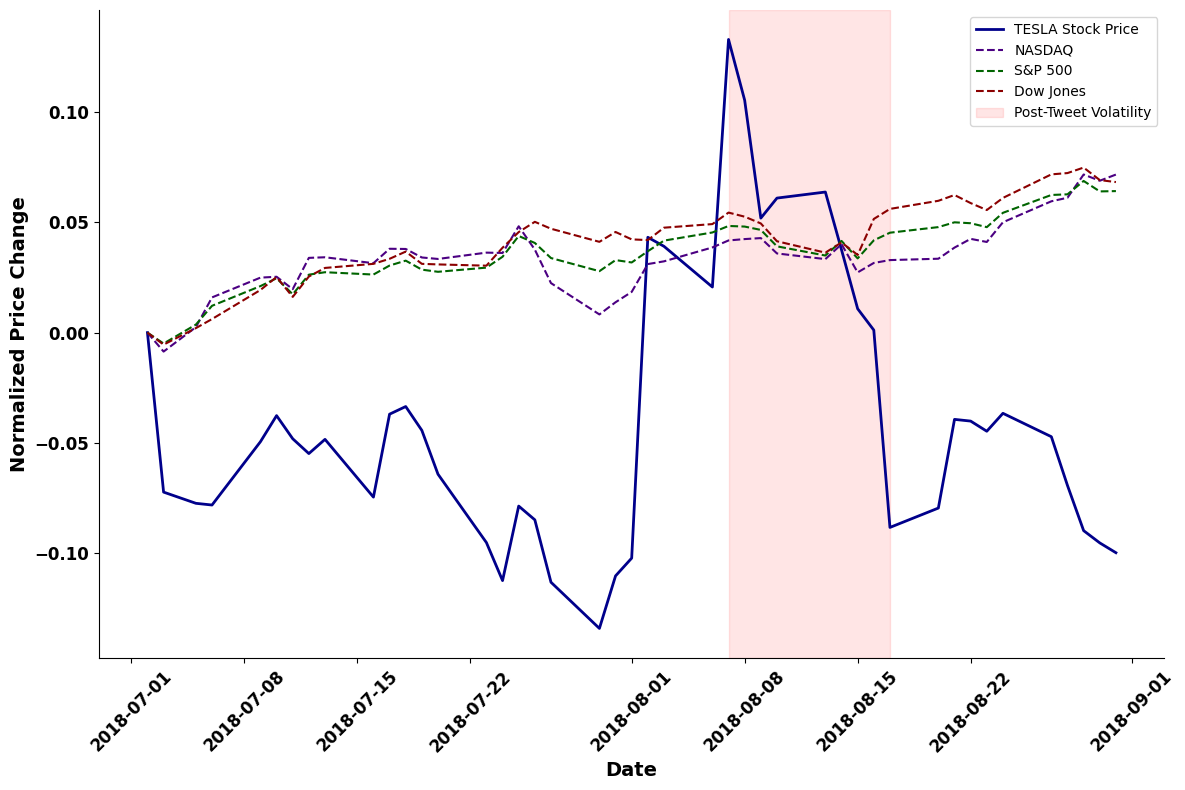

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Function to normalize data
def normalize(data):
    return (data / data.iloc[0]) - 1

# Download historical data for Tesla and major indexes
tickers = ["TSLA", "^IXIC", "^GSPC", "^DJI"]
start_date = "2018-07-01"
end_date = "2018-09-01"
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

if not data.empty:
    # Normalize the data
    normalized_data = data.apply(normalize)

    # Calculate moving averages
    ma_short = normalized_data['TSLA'].rolling(window=9).mean()
    ma_long = normalized_data['TSLA'].rolling(window=27).mean()

    # Create a plot
    plt.figure(figsize=(12, 8))
    plt.plot(normalized_data.index, normalized_data['TSLA'], label='TESLA Stock Price', color='darkblue', linewidth=2)

    # Plotting the indexes
    plt.plot(normalized_data.index, normalized_data['^IXIC'], label='NASDAQ', color='indigo', linestyle='dashed')
    plt.plot(normalized_data.index, normalized_data['^GSPC'], label='S&P 500', color='darkgreen', linestyle='dashed')
    plt.plot(normalized_data.index, normalized_data['^DJI'], label='Dow Jones', color='darkred', linestyle='dashed')

    # Set axes labels and titles with bigger, darker fonts
    plt.xlabel('Date', fontsize=14, fontweight='bold')
    plt.ylabel('Normalized Price Change', fontsize=14, fontweight='bold')

    # Improve aesthetics for x-axis
    plt.xticks(rotation=45, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    # Highlight the area with increased volatility
    tweet_date = pd.to_datetime('2018-08-07')
    plt.axvspan(tweet_date, tweet_date + pd.Timedelta(days=10), color='red', alpha=0.1, label='Post-Tweet Volatility')

    plt.legend()

    # Remove the top and right spines to achieve an open plot look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()  # Adjust layout

    # Save the plot as a PNG file
    plt.savefig('mainchart_1.png', format='png')
    plt.show()
else:
    print("Failed to fetch data. Check the ticker symbol and date range.")

[*********************100%%**********************]  4 of 4 completed


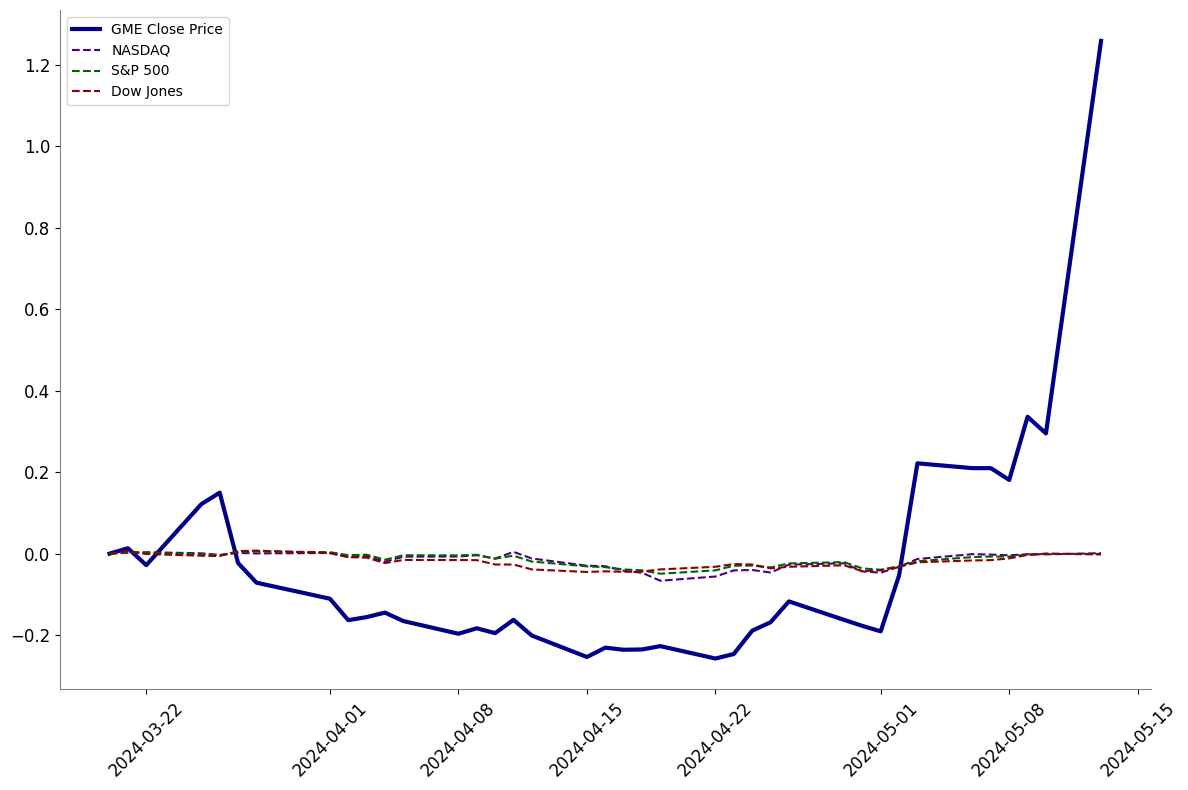

<Figure size 640x480 with 0 Axes>

In [46]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the ticker symbols for GameStop and major indices
tickerSymbols = ['GME', '^IXIC', '^GSPC', '^DJI']  # GME, NASDAQ, S&P 500, Dow Jones

# Get data on these tickers
tickerData = yf.Tickers(tickerSymbols)  # Use Tickers for multiple tickers

# Assuming the current date is within or past May 2024, we can use datetime to define the range
today = datetime.today().strftime('%Y-%m-%d')
start_date = '2024-03-20'
end_date = '2024-05-14'

# Get the historical prices for these tickers
tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)['Close']

# Function to normalize data
def normalize(data):
    return (data / data.iloc[0]) - 1

# Check if there is any data
if not tickerDf.empty:
    # Normalize the data
    normalized_data = tickerDf.apply(normalize)

    # Plotting the data
    plt.figure(figsize=(12, 8))
    plt.plot(normalized_data['GME'], label='GME Close Price', color='darkblue', linewidth=3)
    plt.plot(normalized_data['^IXIC'], label='NASDAQ', color='indigo', linestyle='dashed', linewidth=1.5)
    plt.plot(normalized_data['^GSPC'], label='S&P 500', color='darkgreen', linestyle='dashed', linewidth=1.5)
    plt.plot(normalized_data['^DJI'], label='Dow Jones', color='darkred', linestyle='dashed', linewidth=1.5)
    
    #plt.title('Normalized Close Prices - April to Mid-May 2024', fontsize=16, fontweight='bold', color='navy')
    #plt.xlabel('Date', fontsize=12, fontweight='bold')
    #plt.ylabel('Normalized Close Price', fontsize=12, fontweight='bold')
    
    # Styling the spines to make the plot cleaner
    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('gray')  # Lighten the left spine
    ax.spines['bottom'].set_color('gray')  # Lighten the bottom spine

    # Set the background to be transparent inside the plotting area
    ax.set_facecolor('none')
    
    # Optionally, you can make the axis ticks bolder or styled
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    plt.legend()
    plt.tight_layout()  # Adjust layout
    plt.show()
    plt.savefig('gme_1.png', format='png')
else:
    print("No data available for the specified range. Please check the dates or wait until the data becomes available.")

[*********************100%%**********************]  4 of 4 completed


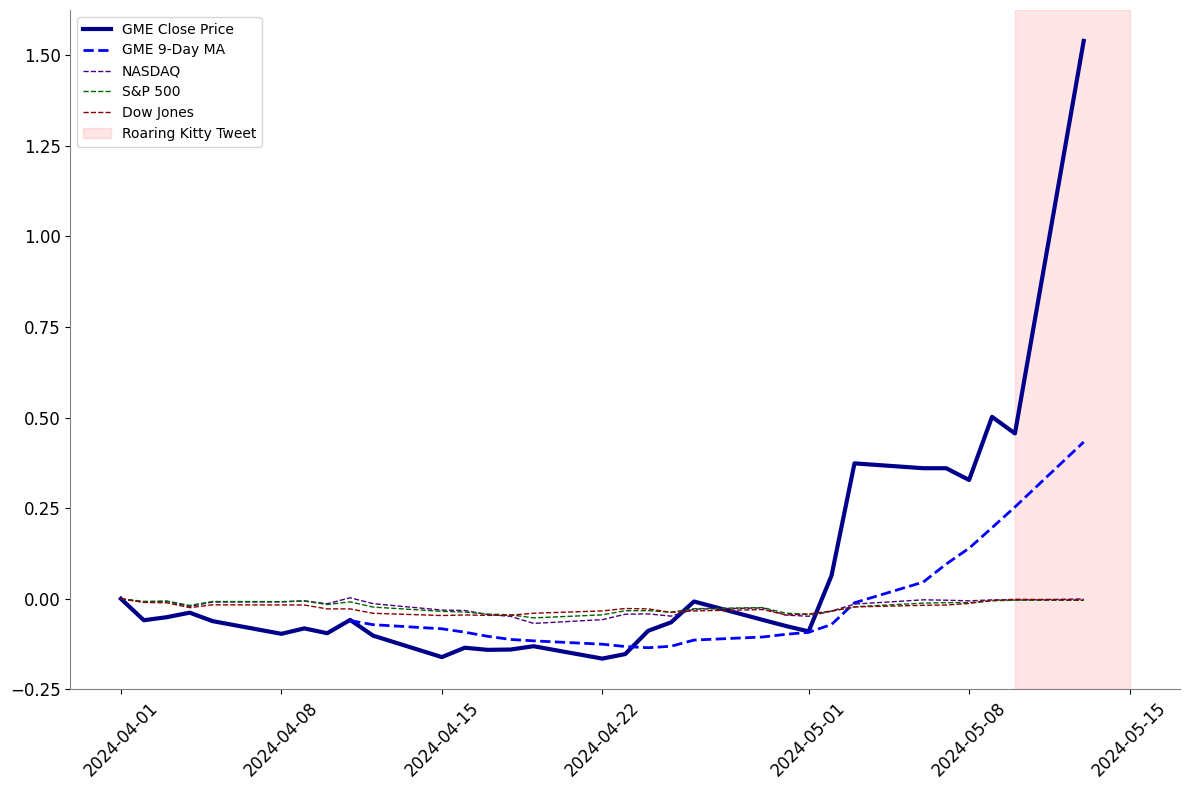

In [47]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the ticker symbols for GameStop and major indices
tickerSymbols = ['GME', '^IXIC', '^GSPC', '^DJI']  # GME, NASDAQ, S&P 500, Dow Jones

# Get data on these tickers
tickerData = yf.Tickers(tickerSymbols)  # Use Tickers for multiple tickers

# Assuming the current date is within or past May 2024, we can use datetime to define the range
today = datetime.today().strftime('%Y-%m-%d')
start_date = '2024-04-01'
end_date = '2024-05-14'

# Get the historical prices for these tickers
tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)['Close']

# Function to normalize data
def normalize(data):
    return (data / data.iloc[0]) - 1

# Check if there is any data
if not tickerDf.empty:
    # Normalize the data
    normalized_data = tickerDf.apply(normalize)

    # Calculate moving averages for GME
    ma_9_GME = normalized_data['GME'].rolling(window=9).mean()
    ma_27_GME = normalized_data['GME'].rolling(window=27).mean()

    # Plotting the data
    plt.figure(figsize=(12, 8))
    plt.plot(normalized_data['GME'], label='GME Close Price', color='darkblue', linewidth=3)
    plt.plot(ma_9_GME, label='GME 9-Day MA', color='blue', linestyle='dashed', linewidth=2)

    plt.plot(normalized_data['^IXIC'], label='NASDAQ', color='indigo', linestyle='dashed', linewidth=1)
    plt.plot(normalized_data['^GSPC'], label='S&P 500', color='darkgreen', linestyle='dashed', linewidth=1)
    plt.plot(normalized_data['^DJI'], label='Dow Jones', color='darkred', linestyle='dashed', linewidth=1)
    
    #plt.title('Normalized Close Prices - April to Mid-May 2024', fontsize=16, fontweight='bold', color='navy')
    #plt.xlabel('Date', fontsize=12, fontweight='bold')
    #plt.ylabel('Normalized Close Price', fontsize=12, fontweight='bold')

    # Highlight the period of significant activity
    surge_start = pd.to_datetime("2024-05-10")
    surge_end = pd.to_datetime("2024-05-15")
    plt.axvspan(surge_start, surge_end, color='red', alpha=0.1, label='Roaring Kitty Tweet')
    
    # Styling the spines to make the plot cleaner
    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('gray')  # Lighten the left spine
    ax.spines['bottom'].set_color('gray')  # Lighten the bottom spine

    # Set the background to be transparent inside the plotting area
    ax.set_facecolor('none')
    
    # Optionally, you can make the axis ticks bolder or styled
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    plt.legend()
    plt.tight_layout()  # Adjust layout

    # Save the plot as a PNG file
    plt.savefig('normalized_prices_with_MA_chart.png', format='png', dpi=300)  # High resolution
    plt.show()
else:
    print("No data available for the specified range. Please check the dates or wait until the data becomes available.")

[*********************100%%**********************]  1 of 1 completed


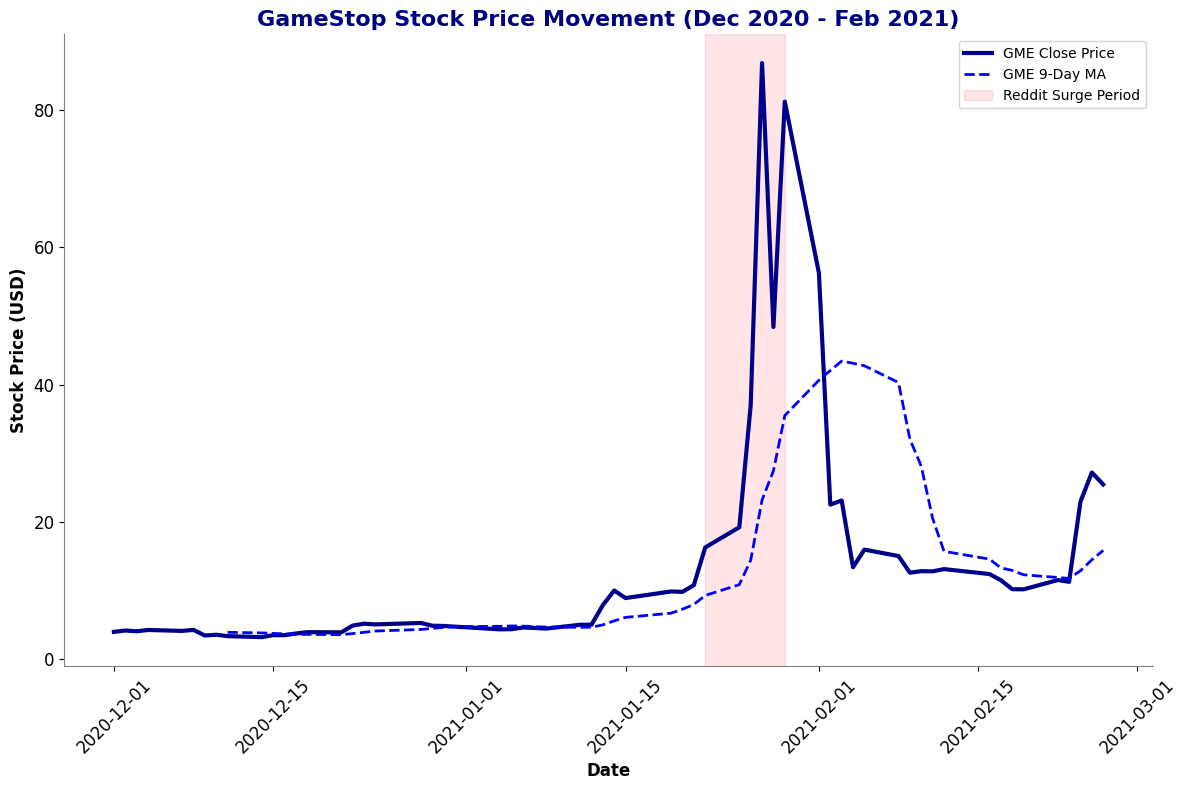

In [35]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Set the ticker and the date range of interest
ticker = "GME"
start_date = "2020-12-01"
end_date = "2021-02-28"

# Download the historical data for GameStop
data = yf.download(ticker, start=start_date, end=end_date)

if not data.empty:
    # Calculate the 9-day moving average
    data['MA9'] = data['Close'].rolling(window=9).mean()

    # Plotting the stock price and moving average
    plt.figure(figsize=(12, 8))
    plt.plot(data.index, data['Close'], label='GME Close Price', color='darkblue', linewidth=3)
    plt.plot(data.index, data['MA9'], label='GME 9-Day MA', color='blue', linestyle='dashed', linewidth=2)

    # Highlight the period of significant activity
    surge_start = pd.to_datetime("2021-01-22")
    surge_end = pd.to_datetime("2021-01-29")
    plt.axvspan(surge_start, surge_end, color='red', alpha=0.1, label='Reddit Surge Period')

    # Adding title and labels with styles from your provided code
    plt.title('GameStop Stock Price Movement (Dec 2020 - Feb 2021)', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Date', fontsize=12, fontweight='bold')
    plt.ylabel('Stock Price (USD)', fontsize=12, fontweight='bold')

    # Formatting the x-axis for better readability
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Styling the spines to make the plot cleaner
    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('gray')  # Lighten the left spine
    ax.spines['bottom'].set_color('gray')  # Lighten the bottom spine

    # Set the background to be transparent inside the plotting area
    ax.set_facecolor('none')

    plt.legend()
    plt.tight_layout()  # Adjust layout

    # Save the plot
    plt.savefig('gamestop_stock_price_with_ma_chart.png', format='png', dpi=300)
    plt.show()
else:
    print("Failed to fetch data. Check the ticker symbol and date range.")

[*********************100%%**********************]  4 of 4 completed


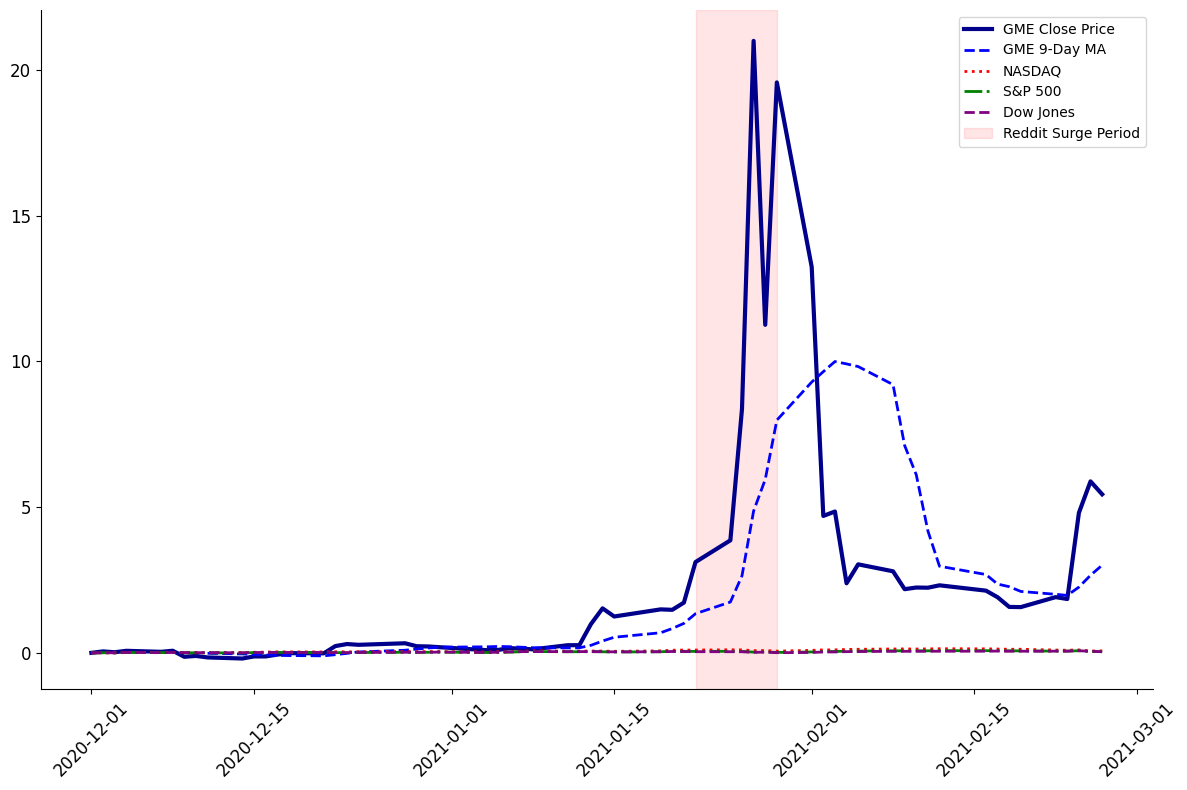

In [39]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Function to normalize data
def normalize(data):
    return (data / data.iloc[0]) - 1

# Set the tickers for GameStop and major indices
tickers = ["GME", "^IXIC", "^GSPC", "^DJI"]
start_date = "2020-12-01"
end_date = "2021-02-28"

# Download the historical data for GameStop and the indices
data = yf.download(tickers, start=start_date, end=end_date)

if not data.empty:
    # Normalize the data
    normalized_data = data['Close'].apply(normalize)

    # Calculate the 9-day moving average for GME
    normalized_data['MA9_GME'] = normalized_data['GME'].rolling(window=9).mean()

    # Plotting the stock price, moving average, and indices
    plt.figure(figsize=(12, 8))
    plt.plot(normalized_data.index, normalized_data['GME'], label='GME Close Price', color='darkblue', linewidth=3)
    plt.plot(normalized_data.index, normalized_data['MA9_GME'], label='GME 9-Day MA', color='blue', linestyle='dashed', linewidth=2)
    plt.plot(normalized_data.index, normalized_data['^IXIC'], label='NASDAQ', color='red', linestyle='dotted', linewidth=2)
    plt.plot(normalized_data.index, normalized_data['^GSPC'], label='S&P 500', color='green', linestyle='dashdot', linewidth=2)
    plt.plot(normalized_data.index, normalized_data['^DJI'], label='Dow Jones', color='purple', linestyle='dashed', linewidth=2)

    # Highlight the period of significant activity
    surge_start = pd.to_datetime("2021-01-22")
    surge_end = pd.to_datetime("2021-01-29")
    plt.axvspan(surge_start, surge_end, color='red', alpha=0.1, label='Reddit Surge Period')

    # Adding title and labels
    #plt.title('GameStop and Major Indices Stock Price Movement (Dec 2020 - Feb 2021)', fontsize=16, fontweight='bold', color='navy')
    #plt.xlabel('Date', fontsize=12, fontweight='bold')
    #plt.ylabel('Normalized Close Price', fontsize=12, fontweight='bold')

    # Formatting the x-axis for better readability
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Styling the spines to make the plot cleaner
    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')  # Lighten the left spine
    ax.spines['bottom'].set_color('black')  # Lighten the bottom spine

    # Set the background to be transparent inside the plotting area
    ax.set_facecolor('none')

    plt.legend()
    plt.tight_layout()  # Adjust layout

    # Save the plot
    plt.savefig('gamestop_and_indices_normalized.png', format='png', dpi=300)
    plt.show()
else:
    print("Failed to fetch data. Check the ticker symbol and date range.")

[*********************100%%**********************]  1 of 1 completed
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


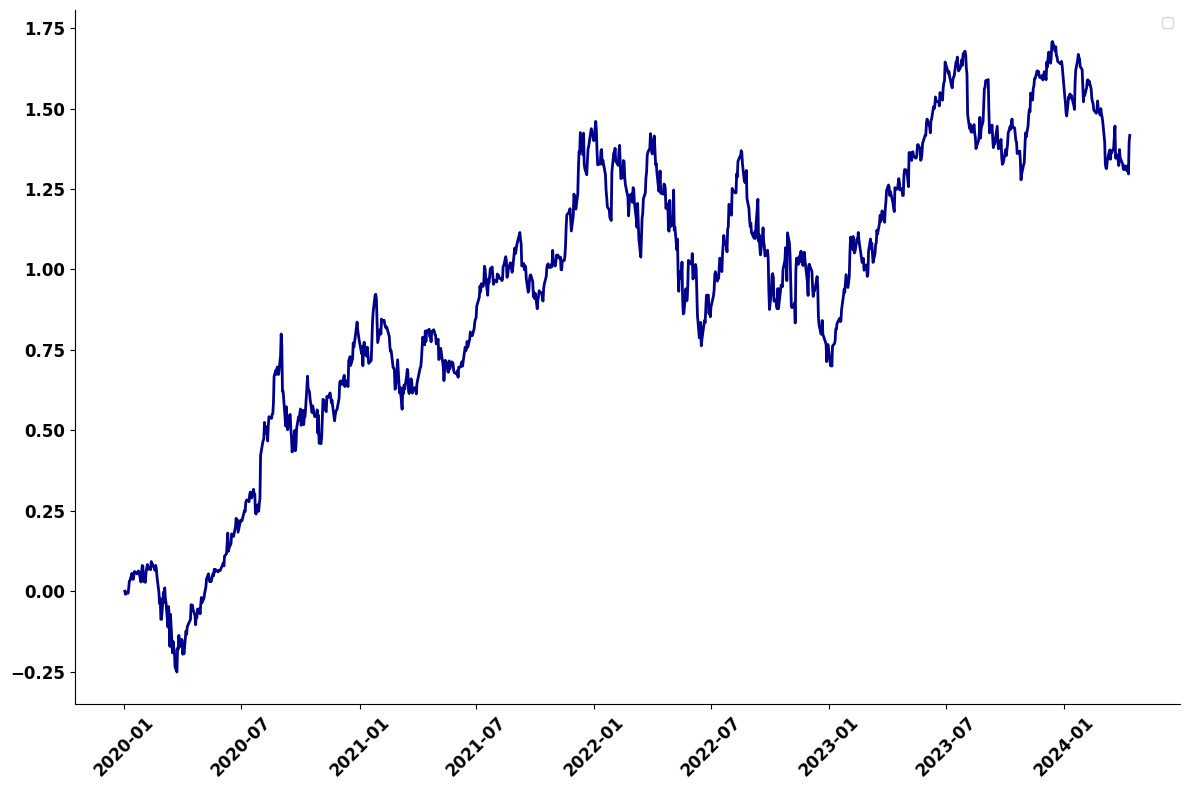

In [57]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Function to normalize data; adapted to work directly on DataFrame columns
def normalize(data):
    return (data / data.iloc[0]) - 1

# Download historical data for Apple
tickers = ["AAPL"]
start_date = "2020-01-01"
end_date = "2024-04-15"
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

if not data.empty:
    # Normalize the data
    normalized_data = normalize(data)  # Applying directly to DataFrame

    # Create a plot
    plt.figure(figsize=(12, 8))
    plt.plot(normalized_data.index, normalized_data, color='darkblue', linewidth=2)

    # Set axes labels and titles with bigger, darker fonts
    #plt.xlabel('Date', fontsize=14, fontweight='bold')
    #plt.ylabel('Normalized Price Change', fontsize=14, fontweight='bold')

    # Improve aesthetics for x-axis
    plt.xticks(rotation=45, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    plt.legend()

    # Remove the top and right spines to achieve an open plot look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()  # Adjust layout

    # Save the plot as a PNG file
    plt.savefig('AAPL_normalized_chart.png', format='png')
    plt.show()
else:
    print("Failed to fetch data. Check the ticker symbol and date range.")

[*********************100%%**********************]  1 of 1 completed


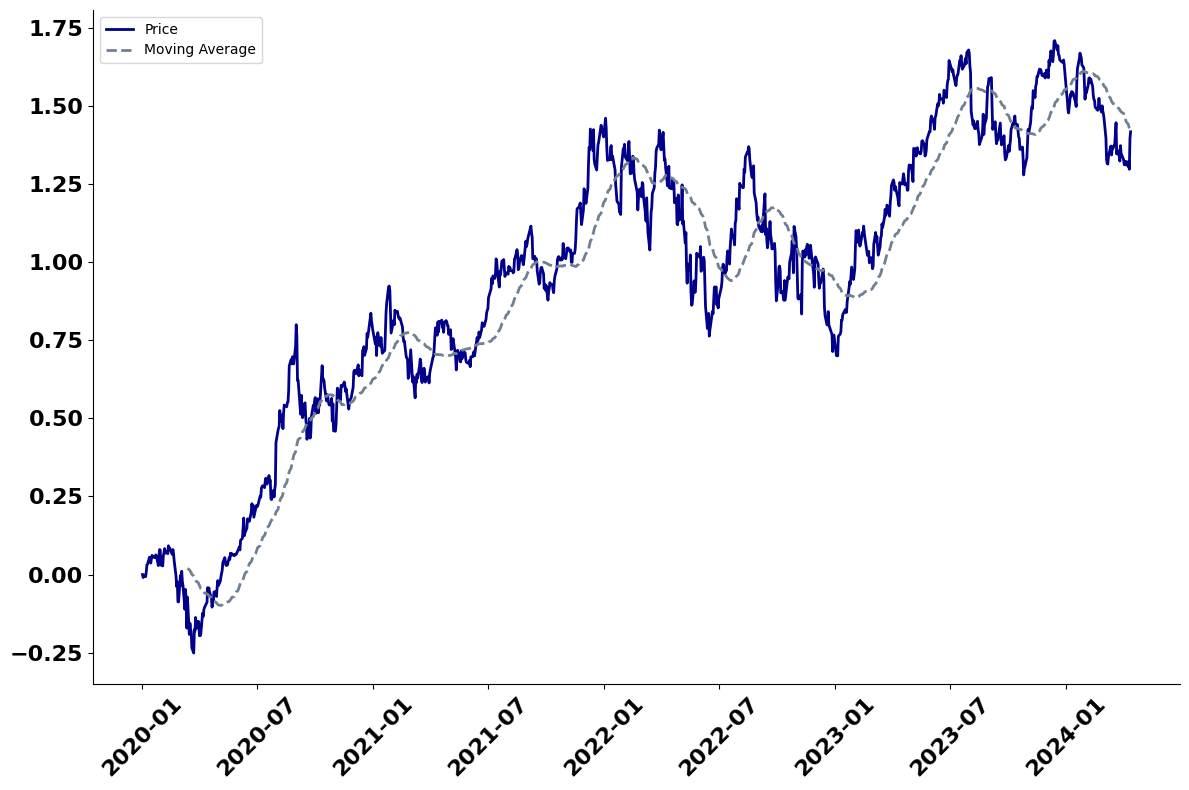

In [66]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Function to normalize data; adapted to work directly on DataFrame columns
def normalize(data):
    return (data / data.iloc[0]) - 1

# Download historical data for Apple
tickers = ["AAPL"]
start_date = "2020-01-01"
end_date = "2024-04-15"
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

if not data.empty:
    # Normalize the data
    normalized_data = normalize(data)  # Applying directly to DataFrame

    # Calculate the 50-day moving average on the normalized data
    moving_average_50 = normalized_data.rolling(window=50).mean()

    # Create a plot
    plt.figure(figsize=(12, 8))
    plt.plot(normalized_data.index, normalized_data, color='darkblue', linewidth=2, label='Price')
    plt.plot(moving_average_50.index, moving_average_50, color='slategray', linestyle='dashed', linewidth=2, label='Moving Average')

    # Set axes labels and titles with bigger, darker fonts
    #plt.xlabel('Date', fontsize=14, fontweight='bold')
    #plt.ylabel('Normalized Price Change', fontsize=14, fontweight='bold')

    # Improve aesthetics for x-axis
    plt.xticks(rotation=45, fontsize=16, fontweight='bold')
    plt.yticks(fontsize=16, fontweight='bold')

    plt.legend()

    # Remove the top and right spines to achieve an open plot look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()  # Adjust layout

    # Save the plot as a PNG file
    plt.savefig('AAPL_normalized_chart_with_MA.png', format='png')
    plt.show()
else:
    print("Failed to fetch data. Check the ticker symbol and date range.")

[*********************100%%**********************]  3 of 3 completed


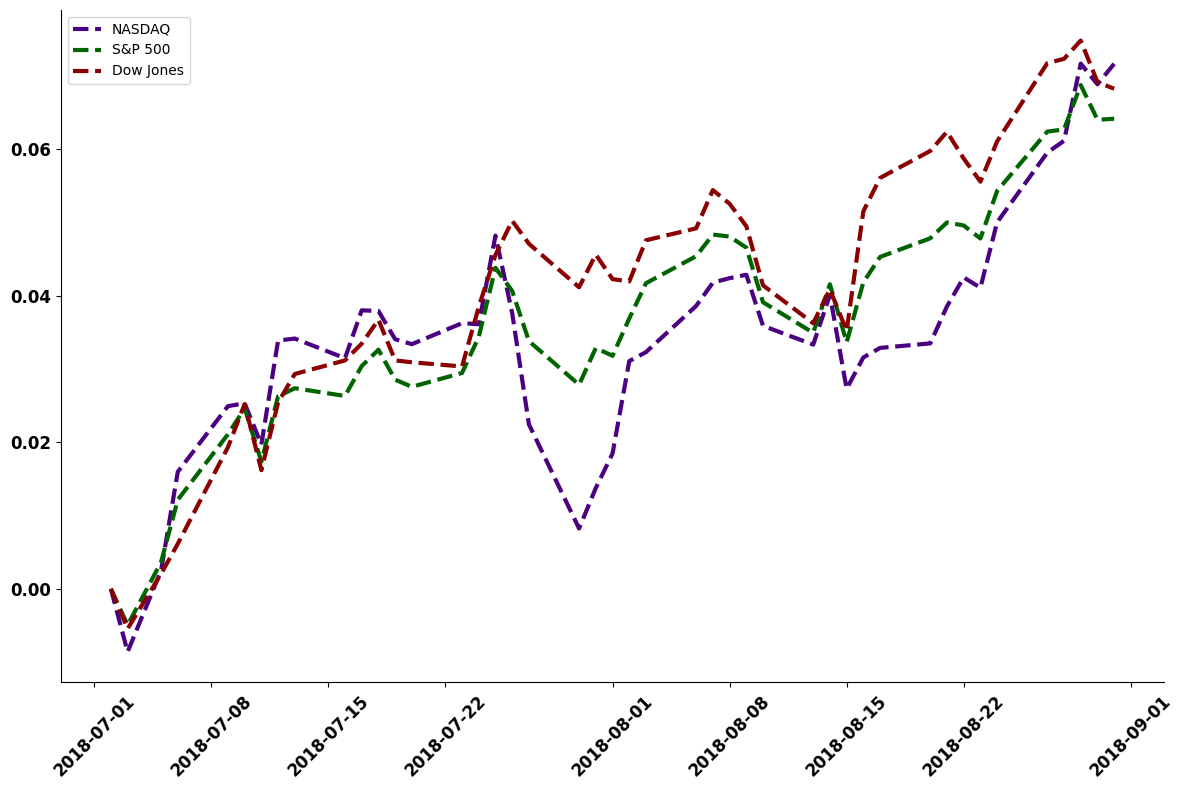

In [64]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Function to normalize data
def normalize(data):
    return (data / data.iloc[0]) - 1

# Download historical data for major indexes
tickers = ["^IXIC", "^GSPC", "^DJI"]
start_date = "2018-07-01"
end_date = "2018-09-01"
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

if not data.empty:
    # Normalize the data
    normalized_data = data.apply(normalize)

    # Create a plot
    plt.figure(figsize=(12, 8))

    # Plotting the indexes
    plt.plot(normalized_data.index, normalized_data['^IXIC'], label='NASDAQ', color='indigo', linestyle='dashed',linewidth= 3)
    plt.plot(normalized_data.index, normalized_data['^GSPC'], label='S&P 500', color='darkgreen', linestyle='dashed',linewidth=3)
    plt.plot(normalized_data.index, normalized_data['^DJI'], label='Dow Jones', color='darkred', linestyle='dashed',linewidth=3)

    # Set axes labels and titles with bigger, darker fonts
    #plt.xlabel('Date', fontsize=14, fontweight='bold')
    #plt.ylabel('Normalized Price Change', fontsize=14, fontweight='bold')

    # Improve aesthetics for x-axis
    plt.xticks(rotation=45, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    plt.legend()

    # Remove the top and right spines to achieve an open plot look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()  # Adjust layout

    # Save the plot as a PNG file
    plt.savefig('main_indexes_chart.png', format='png')
    plt.show()
else:
    print("Failed to fetch data. Check the ticker symbol and date range.")

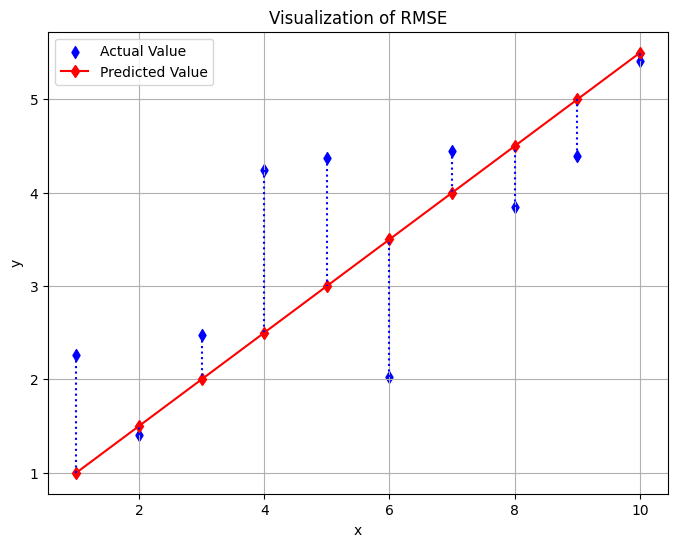

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate some example data
x = np.arange(1, 11)  # Example x values from 1 to 10
actual_y = x * 0.5 + np.random.normal(size=x.size)  # Actual y values with some noise
predicted_y = x * 0.5 + 0.5  # Predicted y values slightly offset

# Create the plot
plt.figure(figsize=(8, 6))

# Plotting actual values
plt.scatter(x, actual_y, color='blue', label='Actual Value', marker='d')

# Plotting predicted values
plt.plot(x, predicted_y, color='red', label='Predicted Value', marker='d', linestyle='-')

# Plotting errors
for i in range(len(x)):
    plt.vlines(x[i], ymin=actual_y[i], ymax=predicted_y[i], color='blue', linestyle='dotted')

# Adding labels
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of RMSE')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

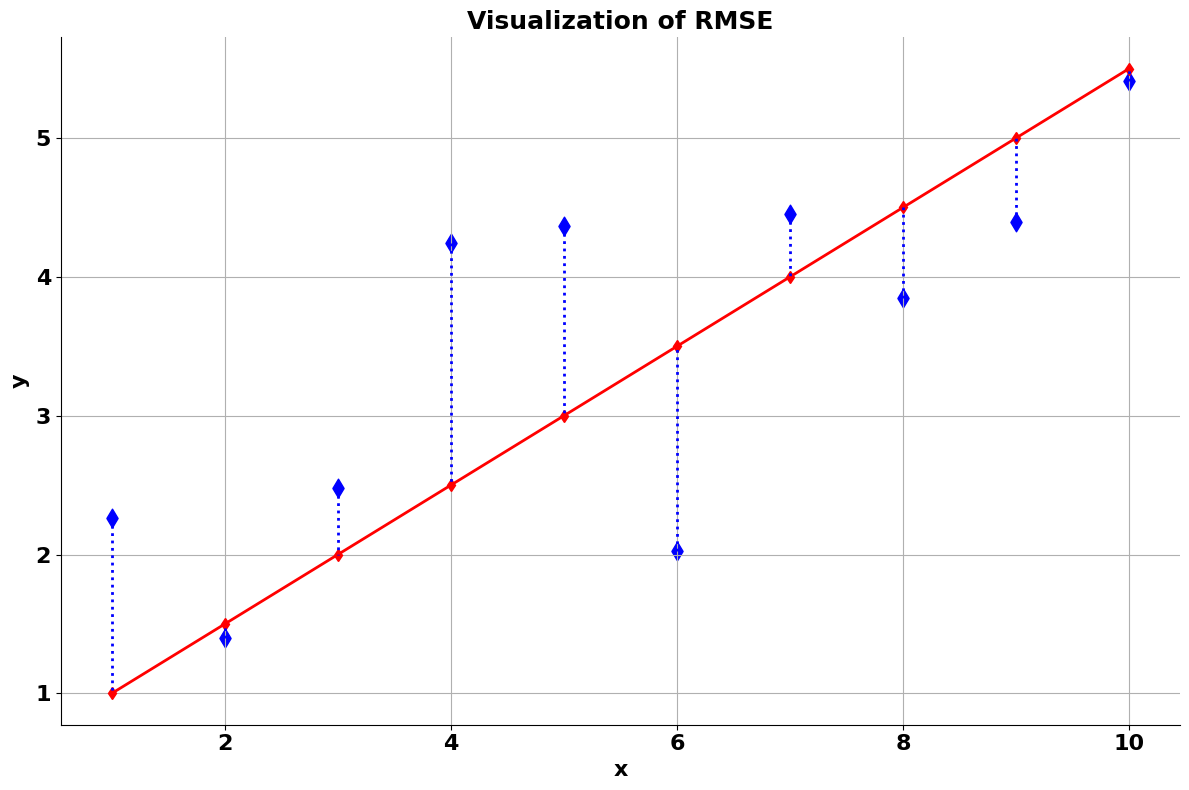

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate some example data
x = np.arange(1, 11)  # Example x values from 1 to 10
actual_y = x * 0.5 + np.random.normal(size=x.size)  # Actual y values with some noise
predicted_y = x * 0.5 + 0.5  # Predicted y values slightly offset

# Create the plot
plt.figure(figsize=(12, 8))

# Plotting actual values
plt.scatter(x, actual_y, color='blue', label='Actual Value', marker='d', s=90)  # Increased marker size

# Plotting predicted values
plt.plot(x, predicted_y, color='red', label='Predicted Value', marker='d', linestyle='-', linewidth=2)

# Plotting errors
for i in range(len(x)):
    plt.vlines(x[i], ymin=actual_y[i], ymax=predicted_y[i], color='blue', linestyle='dotted', linewidth=2)

# Adding labels and title with bigger, darker fonts
plt.xlabel('x', fontsize=16, fontweight='bold')
plt.ylabel('y', fontsize=16, fontweight='bold')
plt.title('Visualization of RMSE', fontsize=18, fontweight='bold')

# Setting font size for ticks
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

plt.legend(fontsize=14)

# Remove the top and right spines to achieve an open plot look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()

In [78]:
!pip install openpyxl
import pandas as pd
# Load the Excel file
file_path = '/Users/Shared/gptwithtext.xlsx'  # Path to the Excel file
df = pd.read_excel(file_path, engine='openpyxl')

# Display the contents of the DataFrame
print(df)

    Epoch   1   Loss:   Train:   0.105,   TrainF:   0.095,   Test:   0.035,  \
0   Epoch   2   Loss:   Train:   0.036,   TrainF:   0.034,   Test:   0.025,   
1   Epoch   3   Loss:   Train:   0.031,   TrainF:   0.030,   Test:   0.020,   
2   Epoch   4   Loss:   Train:   0.029,   TrainF:   0.029,   Test:   0.028,   
3   Epoch   5   Loss:   Train:   0.033,   TrainF:   0.032,   Test:   0.017,   
4   Epoch   6   Loss:   Train:   0.033,   TrainF:   0.032,   Test:   0.028,   
..    ...  ..     ...      ...      ...       ...      ...     ...      ...   
94  Epoch  96   Loss:   Train:   0.013,   TrainF:   0.009,   Test:   0.024,   
95  Epoch  97   Loss:   Train:   0.013,   TrainF:   0.009,   Test:   0.026,   
96  Epoch  98   Loss:   Train:   0.012,   TrainF:   0.009,   Test:   0.021,   
97  Epoch  99   Loss:   Train:   0.012,   TrainF:   0.008,   Test:   0.020,   
98  Epoch  10  | Loss  : Train  : 0.012  , TrainF  : 0.008  , Test  : 0.024   

     TestF:    0.023  
0    TestF:    0.024  
1    

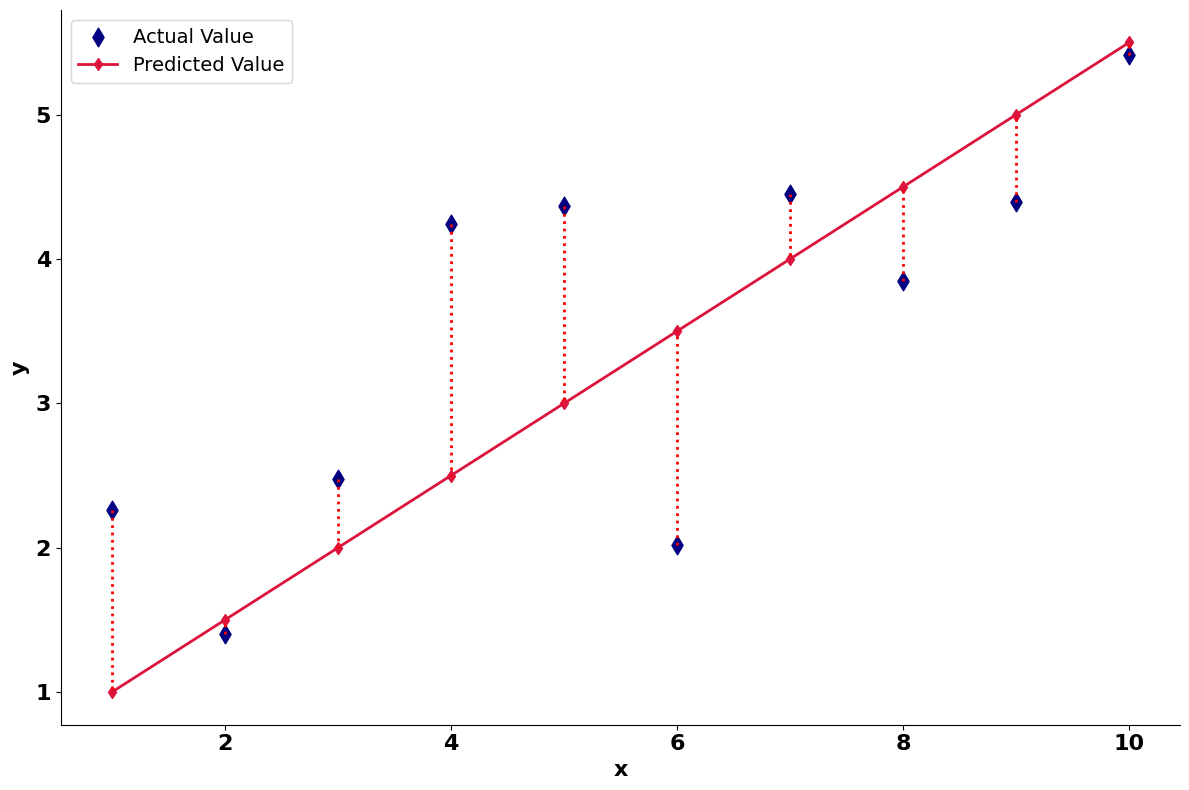

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate some example data
x = np.arange(1, 11)  # Example x values from 1 to 10
actual_y = x * 0.5 + np.random.normal(size=x.size)  # Actual y values with some noise
predicted_y = x * 0.5 + 0.5  # Predicted y values slightly offset

# Create the plot
plt.figure(figsize=(12, 8))

# Plotting actual values
plt.scatter(x, actual_y, color='navy', label='Actual Value', marker='d', s=90)  # Increased marker size

# Plotting predicted values
plt.plot(x, predicted_y, color='crimson', label='Predicted Value', marker='d', linestyle='-', linewidth=2)

# Plotting errors
for i in range(len(x)):
    plt.vlines(x[i], ymin=actual_y[i], ymax=predicted_y[i], color='red', linestyle='dotted', linewidth=2)

# Adding labels and title with bigger, darker fonts
plt.xlabel('x', fontsize=16, fontweight='bold')
plt.ylabel('y', fontsize=16, fontweight='bold')
#plt.title('Visualization of RMSE', fontsize=18, fontweight='bold')

# Setting font size for ticks
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

plt.legend(fontsize=14)

# Remove the top and right spines to achieve an open plot look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Disable the grid
plt.grid(False)

plt.tight_layout()  # Adjust layout

# Save the plot as a PNG file
plt.savefig('rmse_visualization.png', format='png')

# Show plot
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/var/folders/f0/ckkb_ykj483d49h__2mxzsk00000gn/T/ipykernel_15511/2211441375.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


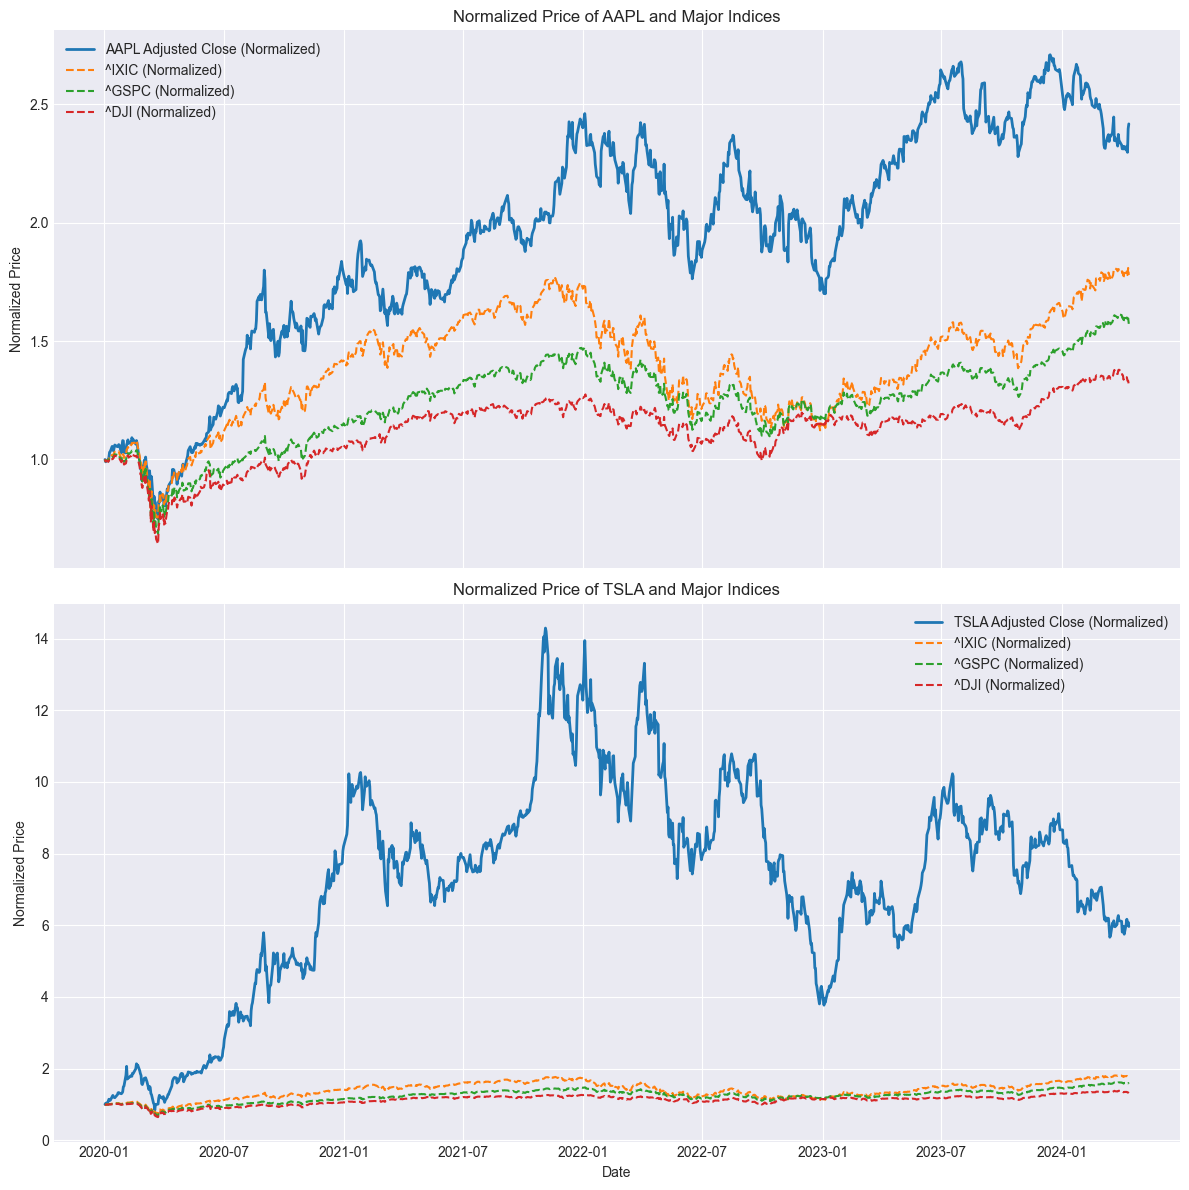

In [88]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define stocks and indices
symbols = ['AAPL', 'TSLA', '^IXIC', '^GSPC', '^DJI']
data = {}
start_date = '2020-01-01'
end_date = '2024-04-15'

# Fetch data from Yahoo Finance
for symbol in symbols:
    data[symbol] = yf.download(symbol, start=start_date, end=end_date)

# Normalize the data
normalized_data = {}
for symbol, df in data.items():
    normalized_data[symbol] = df['Adj Close'] / df['Adj Close'].iloc[0]

# Set up the plotting style
plt.style.use('seaborn-darkgrid')

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), dpi=100, sharex=True)

# Plotting logic
stocks_to_plot = ['AAPL', 'TSLA']
indices = ['^IXIC', '^GSPC', '^DJI']

for ax, stock in zip(axes, stocks_to_plot):
    # Plot the stock
    ax.plot(normalized_data[stock], label=f'{stock} Adjusted Close (Normalized)', linewidth=2)
    
    # Plot the indices on the same subplot
    for index in indices:
        ax.plot(normalized_data[index], label=f'{index} (Normalized)', linewidth=1.5, linestyle='--')
    
    # Set title and labels
    ax.set_title(f'Normalized Price of {stock} and Major Indices')
    ax.set_ylabel('Normalized Price')
    ax.legend()

# Set common X label
axes[-1].set_xlabel('Date')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()